<font size="5">211AI020 - ISHAN GODBOLE</font>

<font size="5">211AI035 - SIDHAARTH SREDHARAN MURALI</font>

<font size="7">IT258 ASSIGNMENT 3</font>

In [137]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.decomposition import PCA

In [138]:
df = pd.read_csv("MVP_Candidates.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,0,0,Nikola Jokić,C,5,26,DEN,74,74,10,...,105,117,144,55,230.9,286.9,1,1,0.875,2021-22
1,1,1,Joel Embiid,C,5,27,PHI,68,68,8,...,105,109,243,47,6.5,169.0,0,2,0.706,2021-22
2,2,2,Giannis Antetokounmpo,PF,4,27,MIL,67,67,7,...,93,112,248,49,125.1,211.1,0,3,0.595,2021-22
3,3,3,Devin Booker,SG,2,25,PHO,68,68,1,...,112,102,103,84,-4.1,32.6,0,4,0.216,2021-22
4,4,4,Luka Dončić,PG,1,22,DAL,65,65,5,...,96,101,140,102,-8.9,15.3,0,5,0.146,2021-22


In [139]:
'''
col_to_drop = []
for i in df.columns:
    if i[0] == '1' or i[0] == '3' or i[0] == '4':
        col_to_drop.append(i)
'''

In [140]:
#df = df.drop(col_to_drop, axis=1)

First, we normalize the data

In [141]:
data = df.drop(['Unnamed: 0.1','Unnamed: 0'], axis =1)
stats = data.describe()
stats = stats.transpose()
def norm(x):
    return ((x - stats['mean']) / stats['std'])

Now, we make the correlation matrix

The correlation matrix is displayed at the end as the heatmap isn't able to show the correlation well due to there being too many variables.

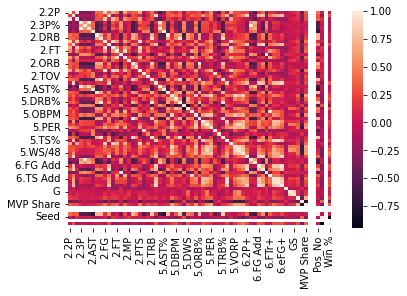

In [142]:
normed_data = norm(data)
normed_data = normed_data.fillna(0)
corr_matrix = normed_data.corr()
dataplot = sns.heatmap(corr_matrix)
plt.show()


In [143]:
print(corr_matrix.to_string())

               2.2P     2.2P%     2.2PA      2.3P     2.3P%     2.3PA     2.AST     2.BLK     2.DRB      2.FG     2.FG%     2.FGA      2.FT     2.FT%     2.FTA      2.MP     2.ORB      2.PF     2.PTS     2.STL     2.TOV     2.TRB    2.eFG%    5.3PAr    5.AST%    5.BLK%     5.BPM    5.DBPM    5.DRB%    5.DRtg     5.DWS     5.FTr    5.OBPM    5.ORB%    5.ORtg     5.OWS     5.PER    5.STL%    5.TOV%    5.TRB%     5.TS%    5.USG%    5.VORP      5.WS   5.WS/48     6.2P+     6.3P+   6.3PAr+  6.FG Add     6.FG+     6.FT+    6.FTr+  6.TS Add     6.TS+    6.eFG+       Age         G        GS       MVP  MVP Rank  MVP Share  Player  Pos    Pos_No      Seed  Tm     Win %  Year
2.2P       1.000000  0.208871  0.948546 -0.392971 -0.257446 -0.364351 -0.309340  0.390458  0.381361  0.855676  0.365344  0.681872  0.489044 -0.282797  0.614865  0.262763  0.329176  0.324179  0.689539 -0.060451  0.176532  0.389169  0.023763 -0.544546 -0.282537  0.336179  0.231090  0.111379  0.305298 -0.156733  0.263078  0.188

In [144]:
corr_matrix.to_csv('CorrelationMatrix.csv')

Now, we do Principal Component Analysis on our features.

We set number of principal components as 10.

In [145]:
pca = PCA(n_components = 10)
pca.fit(normed_data)
data_pca = pca.transform(normed_data)

In [146]:
df_pca = pd.DataFrame(data_pca, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

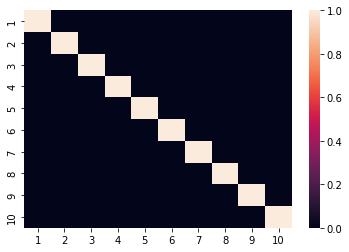

In [147]:
new_corr_matrix = df_pca.corr()
dataplot = sns.heatmap(new_corr_matrix)
plt.show()

As we can see, the correlation between the principal components is minimal, i.e, close to 0.

In [148]:
new_corr_matrix.to_csv("CorrelationMatrixPCA.csv")

Now, we analyze few features that have higher correlation through graphs.

In [149]:
df1 = df.sort_values(by = ['Pos_No', '2.AST'], ascending=[True, False]).reset_index()

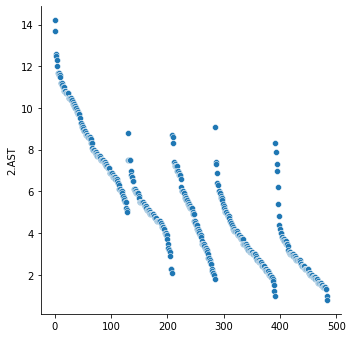

In [150]:
sns.relplot(data=df1, x=df1.index, y='2.AST')

First, we look at Position Number vs Assists per game.

The 5 positions are:

1 - Point Guard

2 - Shooting Guard

3 - Small FOrward

4 - Power Forward

5 - Center

Out of these positions, Point Guards are generally expected to pass more, and hence have more assists per game; and higher the position number, lesser the assists become generally.

In [151]:
df2 = df.sort_values(by = ['Pos_No', '2.TRB'], ascending=[True, False]).reset_index()

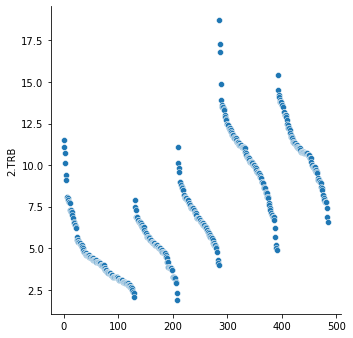

In [152]:
sns.relplot(data=df2, x=df1.index, y='2.TRB')

In [153]:
df3 = df.sort_values(by = ['Pos_No', '2.BLK'], ascending=[True, False]).reset_index()

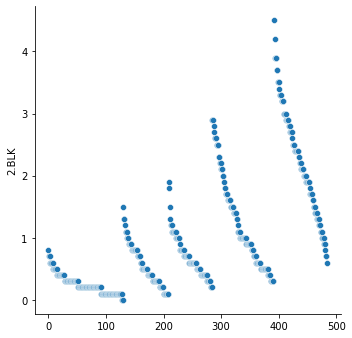

In [154]:
sns.relplot(data=df3, x=df1.index, y='2.BLK')

Similarly, Centers are expected to have more Rebounds per game and Blocks per game.

In [155]:
df4 = df.sort_values(by = ['2.FGA', '5.USG%'], ascending=[True, True]).reset_index()

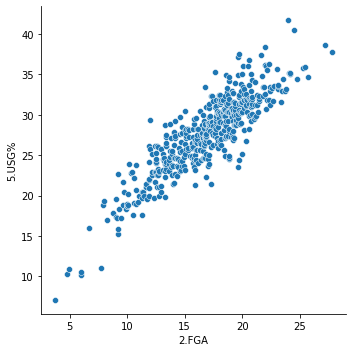

In [156]:
sns.relplot(data=df4, x='2.FGA', y='5.USG%')

Another interesting correlation to look at is Usage % vs Field Goals attempted.

Usage % determines number of possessions by one player as a percentage of number of possessions of the team.

Hence, the higher correlation suggests that higher the % of possessions of a player, higher it is likely that they will attempt more field goals.